## Density Clustering
### Density-Basic Spatial Clustering of Applications with Noise (DBSCAN)
- Density clustering에서 가장 대표적인 알고리즘
- 데이터 분포에 영향을 받음
- K-means clustering은 기준 데이터를 기반으로 분포에 따라 클러스터를 생성하지만
DBSCAN clustering은 각 데이터의 밀도에 영향을 받음
- 같은 클러스터에 포함될 데이터는 밀도가 높게 뭉쳐져 있을 것이라는 가정에서 출발
---

#### DBSCAN이 밀도를 판단하는 2개의 파라미터
• 원소를 중점으로 하는 원의 반지름 ε. 반지름
거리는 Euclidian distance로 측정<br>
• 반경 내 존재해야 하는 최소 원소 갯수 P
___
1. 처음 시작은 무작위로 하나의 점 Q을 선정<br>
2. Q점을 기준으로 ε를 반지름으로 갖는 원을 그림
3. 이 원 안에 들어있는 원소의 갯수가 P와 같거나 큰지 확인
4. P보다 같거나 크면 Q점은 core object로 칭해지며 해당 원을 클러스터로 생성<br>
4-1. 만약 P보다 작다면 Q점을 noise로 정의
5. Core object로 등록해서 클러스터를 생성했으면 다음 원소로 넘어감 → 다음 원소는 원 안에 있는 원소들 중 하나로 선정 (임의의 점 G)
6. G가 P와 같거나 크면 core object --> 단, G가 이전 클러스터에 포함되어 있으면 새로 클러스터를 만들지 않고 이전 클러스터를 확장<br>
6-1. 이전 클러스터와 연관이 없다면 새로운 클러스터 생성

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print (iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


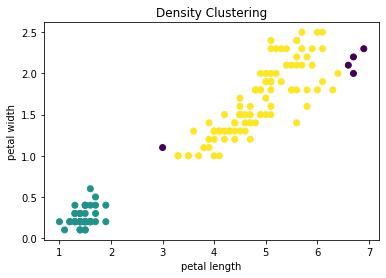

In [2]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples= 10)   # eps = ε = 클러스터의 반지름
db.fit(iris_data_pd.iloc[:,2:4])
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

- 0, 1만 클러스터, -1은 노이즈<br>
양수만 클러스터로 인정

In [3]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


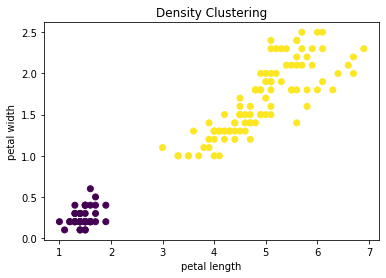

In [4]:
db.set_params(eps = 0.5, min_samples = 5)
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
print(db.labels_)
plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

[ 0  0  0  1  0 -1  0  1  0  1  1 -1  0 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1
 -1 -1 -1  1  0 -1 -1 -1  1  0  1 -1  0  0  0  1  0  0  0 -1 -1  0 -1  0
  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


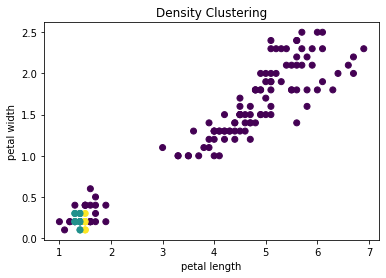

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


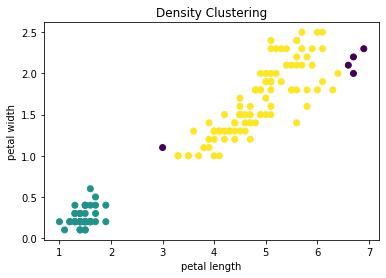

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


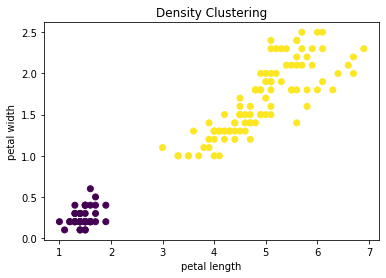

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


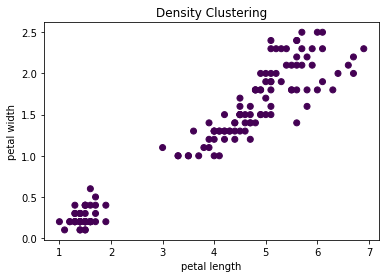

In [7]:
eps = [0.1, 0.5, 1.0, 1.5]
for idx, i in enumerate(eps):
    plt.figure(idx)
    db.set_params(eps = i, min_samples = 10)
    y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
    print(db.labels_)
    plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
    plt.title("Density Clustering")
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.show()

## Make_Moons 예제
- ε 과 P 값에 매우 민감

In [13]:
from sklearn.datasets import make_moons

X,y = make_moons(200, noise=0.05, random_state=0)

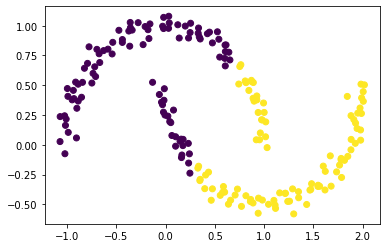

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

D_labels = KMeans(2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

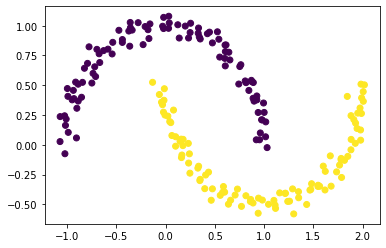

In [15]:
from sklearn.cluster import DBSCAN

D_labels = DBSCAN(eps=0.3, min_samples=15).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

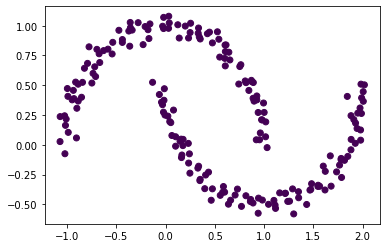

In [18]:
D_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')
D_labels

array([ 4,  2,  3, -1, -1, -1,  4,  2,  4,  2,  0,  3, -1,  2,  0,  4,  1,
        3,  1,  0, -1,  2,  1,  2,  0,  3, -1, -1,  3,  1,  4,  0,  2,  3,
       -1, -1,  3,  4,  0,  3, -1,  0,  1,  3,  2,  0,  4,  0,  3,  2,  0,
        3, -1, -1,  2, -1,  1,  2,  1,  0,  3,  0, -1,  4,  2,  0,  0,  2,
        0,  0,  2,  0, -1, -1,  2,  0,  3,  4,  1,  2, -1,  0,  2, -1,  3,
        0,  4,  0,  2, -1,  1,  4, -1,  0, -1, -1, -1,  3,  0,  3,  2, -1,
        0, -1,  0,  3,  0,  0,  2,  1,  0,  0,  0,  0,  4,  2,  1, -1,  2,
       -1,  4,  0,  3,  0,  3,  0,  4,  3,  2, -1,  4,  0,  0,  3,  2, -1,
        2,  0, -1,  4,  3,  3,  1,  0,  0,  4,  3,  2,  1,  3, -1, -1,  4,
        1,  2,  0,  2,  3,  1,  1,  3,  2,  1,  2,  3, -1,  1,  2,  2,  2,
        1, -1,  0,  0,  3,  2, -1,  0,  0,  1,  2,  0, -1, -1, -1,  1,  0,
        2,  0,  0,  0,  1,  4,  4,  3,  0, -1,  3,  1, -1])

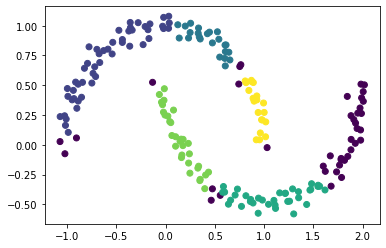

In [16]:
D_labels = DBSCAN(eps=0.3, min_samples=20).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')
D_labels

In [19]:
import pandas as pd
import math
import matplotlib
import numpy as np

In [25]:
np.random.seed(42)

def PointsInCircum(r, n=100):
  return [(math.cos(2*math.pi/n*x)*r + np.random.normal(-30,30), 
           math.sin(2*math.pi/n*x)*r + np.random.normal(-30,30))
          for x in range(1, n+1)]

In [26]:
df = pd.DataFrame(PointsInCircum(500,1000))
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

df = df.append([(np.random.randint(-600,600), np.random.randint(-600,600)) for i in range(300)])
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


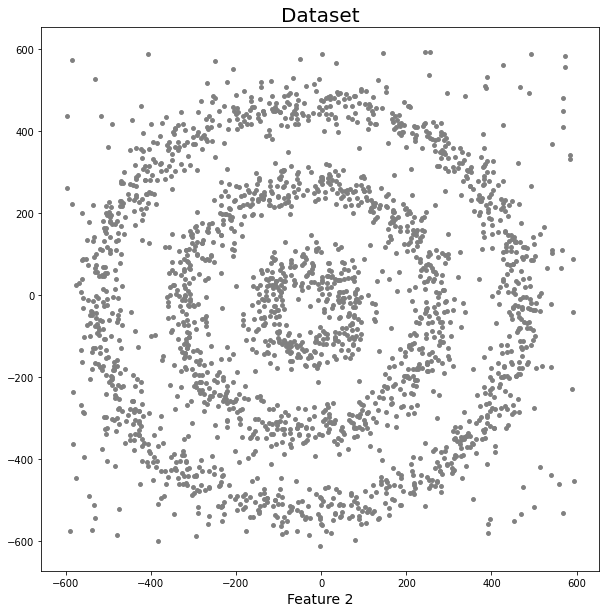

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], s=15, color='grey')
plt.title('Dataset', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.xlabel('Feature 2', fontsize=14)
plt.show()

In [28]:
from sklearn.cluster import KMeans
K_means=KMeans(n_clusters=4, random_state=42)
K_means.fit(df[[0,1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

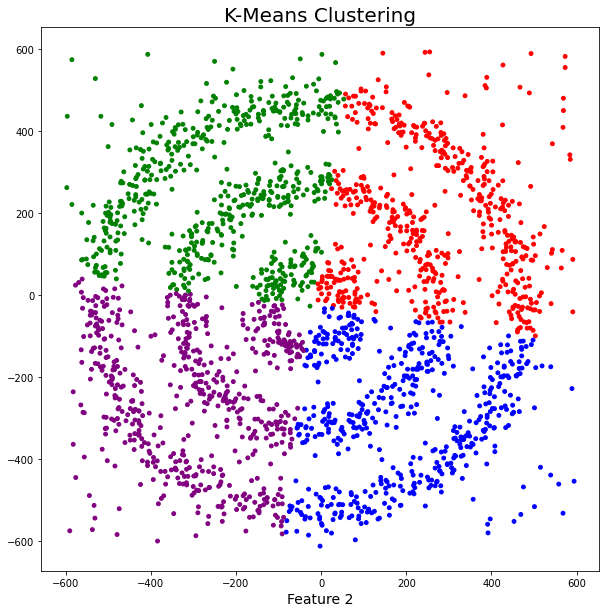

In [29]:
df['KMeans_labels'] = K_means.labels_

colors=['purple', 'red', 'blue', 'green']
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['KMeans_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.xlabel('Feature 2', fontsize=14)
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

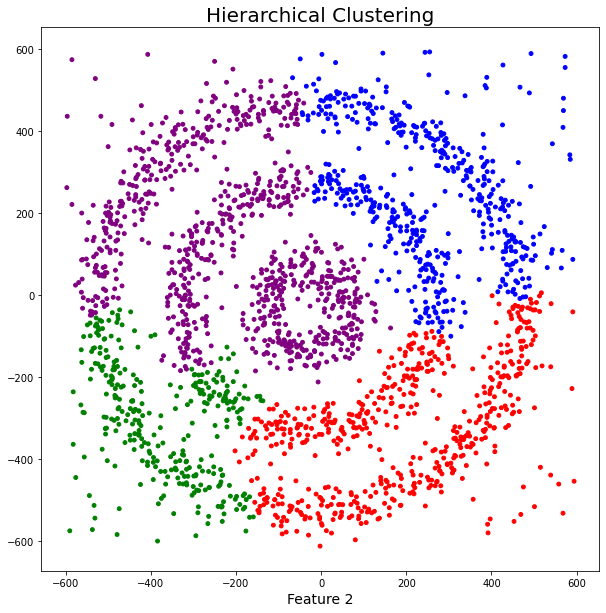

In [32]:
df['HR_labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['HR_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Hierarchical Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.xlabel('Feature 2', fontsize=14)
plt.show()

In [33]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [34]:
df['DBSCAN_labels'] = dbscan.labels_
df['DBSCAN_labels'].value_counts()

-1    2300
Name: DBSCAN_labels, dtype: int64

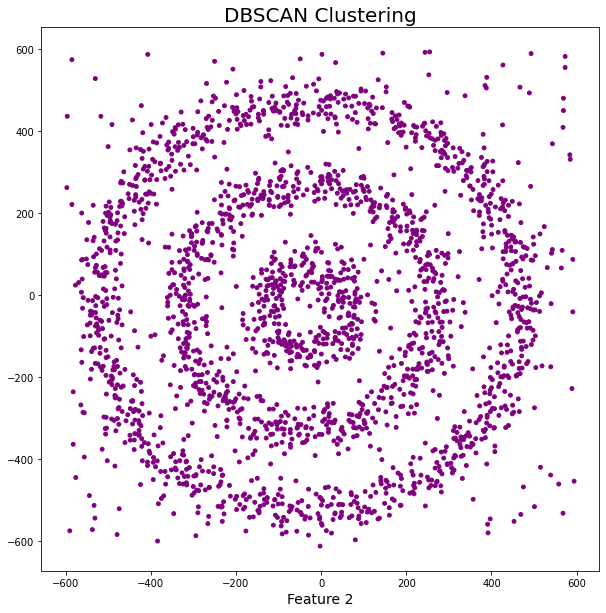

In [35]:
df['DBSCAN_labels'] = dbscan.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['DBSCAN_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.xlabel('Feature 2', fontsize=14)
plt.show()

In [38]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

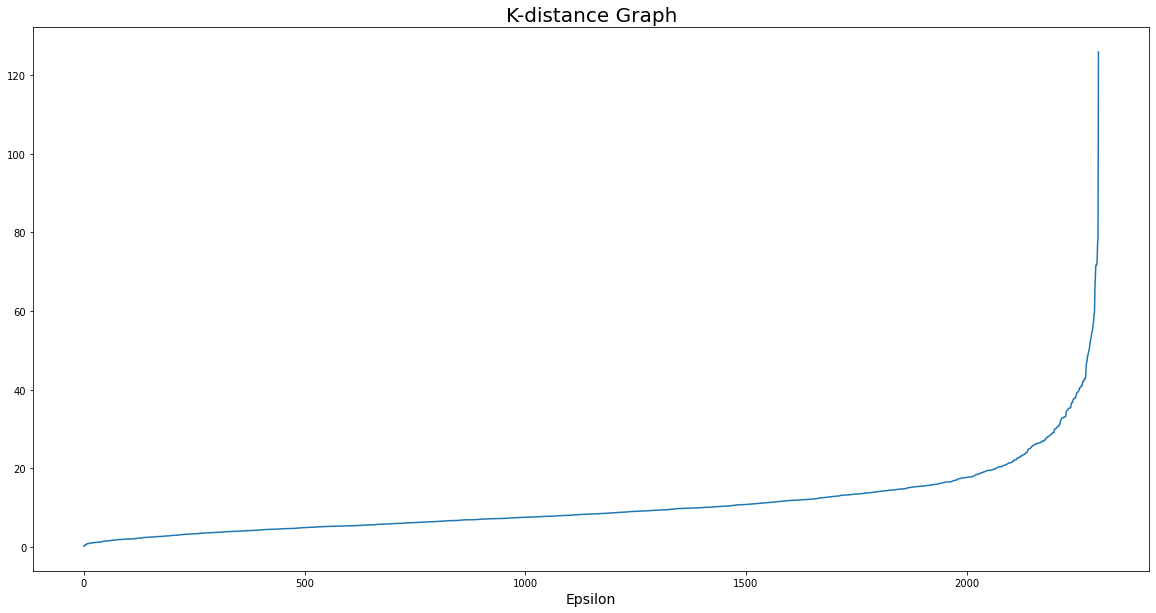

In [39]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.xlabel('Epsilon', fontsize=14)
plt.show()

In [40]:
from sklearn.cluster import DBSCAN
dbscan_opt = DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [41]:
df['DBSCAN_opt_labels'] = dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

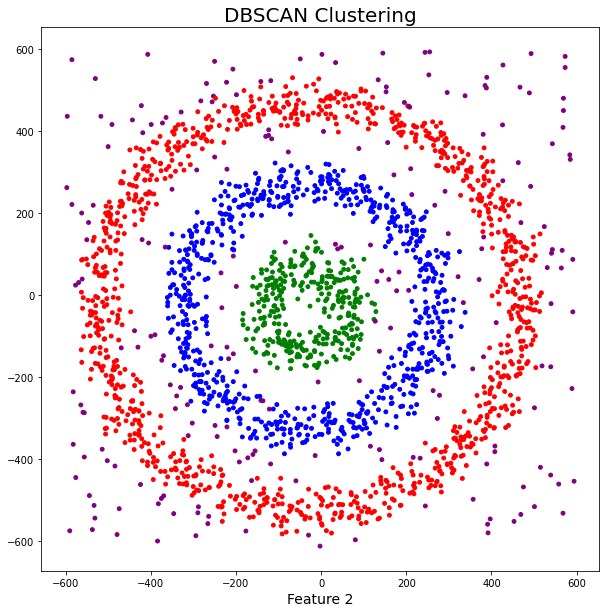

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.xlabel('Feature 2', fontsize=14)
plt.show()